In [5]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import sys
sys.setrecursionlimit(1000000)#


In [6]:
# x, y = make_moons(n_samples=10, noise=0.5, random_state=45, shuffle=True)
# print('x',x)
# print('y',y)
# #print(x,y)
# #画图
# plt.scatter(x[:, 0], x[:, 1], c=y)
# plt.show()

In [7]:
np_data = np.load('20220220_SSS.npz')

In [8]:
Latitude= np_data['lat']  #
Longitude= np_data['lon']      #             
COG= np_data['cog']                 #   

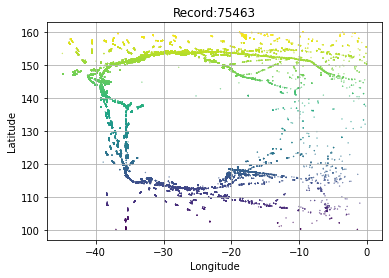

In [9]:
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Record:"+str(len(Latitude)))
plt.scatter(Latitude, Longitude,s=0.1,c=Longitude)

plt.grid()
plt.show()

In [10]:
batch_count = len(Latitude)   
x_train = np.empty([batch_count, 3]) 
print(x_train.shape)

(75463, 3)


In [11]:
for i in range(batch_count):
    x_train[i][0]=Longitude[i] #lon 
    x_train[i][1]=Latitude[i] #lat
    x_train[i][2]=COG[i] #航向角

In [10]:
from sklearn.metrics.pairwise import haversine_distances
from math import sin, cos, sqrt, atan2, radians
def distances(lat1,lon1,lat2,lon2):    
    bsas =  [lat1,lon1]  #
    paris = [lat2,lon2]
    bsas_in_radians = [radians(_) for _ in bsas]
    paris_in_radians = [radians(_) for _ in paris]
    result = haversine_distances([bsas_in_radians, paris_in_radians])
    result = result * 6371000/1000  # multiply by Earth radius to get kilometers
    return (result[1][0])  #

In [19]:
class DBSCAN():
    def __init__(self, file):
        self.dist=0
        self.angle=0        
        self.k_clusters=[]
        self.CorePts=np.array([],dtype=int)
        self.Samples=0
        self.clusters=0
        np_data = np.load(file)  
        self.dist= np_data['distance']  
        self.angle= np_data['angle']      
        self.m = len(self.angle)

    def findDensity(self,point):

        self.CorePts=np.setdiff1d(self.CorePts,point)
        densityPts=np.where( (self.dist[int(point)] < self.epsilon) == True )[0] 
        densityPts=np.where( (self.angle[int(point),densityPts] < self.epsiangle)  == True )[0]
        densityPts=np.intersect1d(densityPts,self.Samples)
        IntersecCorePts=np.intersect1d(self.CorePts,densityPts)
        self.clusters=np.append(self.clusters,densityPts)
        self.clusters=np.unique(self.clusters)
        self.Samples=np.setdiff1d(self.Samples,self.clusters)
        if len(IntersecCorePts)!=0:
            for IntersecCore in IntersecCorePts:
                self.findDensity(IntersecCore)
        return self.clusters
    
    def getSamples(self):
        
        return self.Samples
    
    def fit(self, epsilon, epsiangle, MinPts):
#         m=data.shape[0]   
        self.Samples=np.arange(self.m)
        self.epsilon=epsilon
        self.epsiangle = epsiangle
        self.MinPts=MinPts        
        for idx in range(self.m):      
#              if (np.sum(self.dist[idx]< self.epsilon)) >= self.MinPts and (np.sum(self.angle[idx]< self.epsiangle)) >= self.MinPts :
            fed = (self.dist[idx]< self.epsilon)
            if (np.sum( fed ) >= self.MinPts ) :
                fed = fed.reshape(len(fed)) 
                if (np.sum(  self.angle[idx,fed] < self.epsiangle ) ) >= self.MinPts : #
                    self.CorePts=np.append(self.CorePts,idx)

        print("self.CorePts:",len(self.CorePts),"idx:",idx)
        while(len(self.CorePts)!=0):
            self.clusters=np.array([],dtype=int)
            c=self.findDensity(np.random.choice(self.CorePts))
            self.k_clusters.append(c)
        print("k_clusters:",len(self.k_clusters))
        return self.k_clusters    

In [20]:

model=DBSCAN('0223dis.npz')  


In [21]:
cluster=model.fit(50,20,10)
    

self.CorePts: 74170 idx: 75462
k_clusters: 68388


一共几组: 186
4689
537
1888
41103
1049
2832
37
221
467
98
129
444
1907
77
63
42
2043
705
110
993
12
142
13
12
300
58
2106
62
1637
67
75
16
166
32
498
300
38
300
257
36
36
694
299
687
30
152
137
30
75
18
44
154
345
16
30
124
65
148
32
55
59
151
62
97
81
107
551
112
19
84
12
170
13
12
53
33
66
50
68
10
30
38
142
61
158
58
96
25
191
265
32
41
45
38
20
51
24
27
120
48
13
10
33
42
101
82
13
83
35
66
30
15
40
58
40
35
66
37
96
20
34
47
22
35
49
12
16
23
14
19
59
25
12
50
143
45
13
14
64
25
11
16
30
66
26
15
13
11
15
19
12
28
37
15
15
18
13
38
31
14
10
17
24
22
45
11
13
17
31
20
27
21
16
10
12
23
12
24
10
14
18
12
10
16
10
12


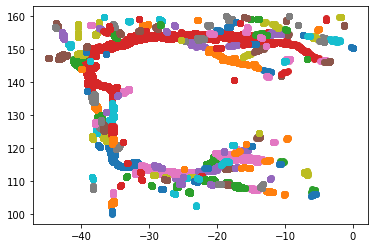

In [12]:
dbscan = [] #
range(len(cluster))
for i in range(len(cluster)):

    dbscan.append(x_train[cluster[i]])
    print(len(cluster[i]))
    plt.scatter(x_train[cluster[i], 1], x_train[cluster[i], 0])
    
plt.show()

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np


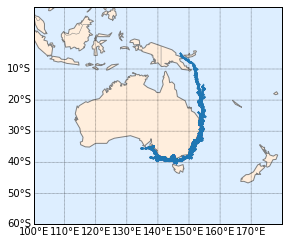

In [45]:

fig=plt.figure()

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
             llcrnrlat=-60, urcrnrlat=10,
             llcrnrlon=100, urcrnrlon=180
           )
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)
# m.drawparallels(np.arange(-90.,90.1,15.))
# m.drawmeridians(np.arange(0.,360.,60.))
m.drawparallels(np.arange(-60,0,10),labels=[1,0,0,0],linewidth=.4)
m.drawmeridians(np.arange(100,180,10),labels=[0,0,0,1],linewidth=.4)
# # plot locations
m.scatter(x_train[cluster[0], 0], x_train[cluster[0], 1], zorder=3,
           cmap='rainbow', latlon=True, marker='.',s=1);
plt.show()

In [22]:

# tiles = 'https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}'
AISMap=folium.Map(location=[-30, 140],
#                  tiles='Stamen Watercolor', #11.684585,54.966245
#                tiles= 'https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}',
#                attr='高德-卫星影像图',
#            tiles='https://webrd02.is.autonavi.com/appmaptile?lang=en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
#            attr='高德-纯英文对照',               
#                 control_scale=True,
#                 width="100%", height="100%",
                 zoom_start=4,
#                   max_zoom=18
               )

In [23]:
def draw_Circle(map, loc, radius, colort): #        color="#ff6633",
    folium.CircleMarker(
        location=loc,
        radius=radius,
        color=colort,
        weight=0.1,
        fill=True,
#         fill_opacity=1,
#         opacity=0.1,
    ).add_to(map)


In [24]:
for lat,lng,in zip(x_train[cluster[0], 1], x_train[cluster[0], 0]):
    draw_Circle(AISMap,[lat,lng],0.5,'#0000ff') 

In [25]:
AISMap